In [164]:
import warnings
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Reading CSV and Basic Data Cleaning

In [165]:
df = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
df = df.dropna(axis='columns', how='all')
# Drop the null rows
df = df.dropna()

# for column, content in df.items():
#     if df[column].dtype == 'int64':
#         data= df.astype({column: 'float64'})


df.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


### Featured columns
Use `koi_disposition` for the y values

In [166]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

# Choose model features
X = df[["koi_impact","koi_period","koi_depth","koi_tce_plnt_num", "ra", "koi_kepmag"]]
y = df["koi_disposition"].values.reshape(-1,1)
X.head()

print(X.shape, y.shape)

(6991, 6) (6991, 1)


In [171]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)

In [172]:
#  for label, koi_disposition in zip(encoded_y, y):
#     print('koi_disposition: ' + str(koi_disposition))
#     print('Encoded Label: ' + str(label))
#     print('-' * 12)

In [173]:
from tensorflow.keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_y = to_categorical(encoded_y)
# one_hot_y
# len(one_hot_y)

In [174]:
# label_encoder.fit_transform(one_hot_y)
print(X.shape, one_hot_y.shape)

(6991, 6) (6991, 3)


In [208]:
y_df= pd.DataFrame(data=one_hot_y[:, 1], index=one_hot_y[:, 1])  
# y_df

In [210]:
print(y_df.shape)

(6991, 1)


### Preprocessing data 
Scaling with MinMaxScaler and separating into training and testing data

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y_df, random_state=42)

# X_train
# # y_train

In [212]:
X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [213]:
y_scaler = MinMaxScaler().fit(y_train)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [221]:
print(X_train_scaled.shape, y_train_scaled.shape)

(5243, 6) (5243, 1)


In [224]:
print(X_test_scaled.shape, y_test_scaled.shape)

(1748, 6) (1748, 1)


### KMeans

In [225]:
 # Create a kmeans model using k = 12
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=12)

# # Fit the model to the data
kmeans.fit(X_test_scaled)

# # Use the data to predict the clusters
# # save the predictions as `predicted_clusters`
predicted_clusters = kmeans.predict(X_test_scaled)


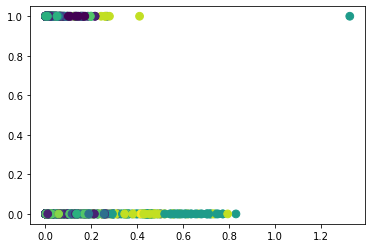

In [226]:
# Plot the clusters
plt.scatter(X_test_scaled[:, 1], y_test_scaled[:, 0], c=predicted_clusters, s=60, cmap='viridis')
plt.show()

In [160]:
 # Print the cluster centers and cluster labels
centers = kmeans.cluster_centers_
labels = kmeans.labels_

centers

array([[ 4.99125552,  3.47788408],
       [-3.01497161,  8.88112331],
       [-2.42182727,  7.14167012],
       [ 3.02434323,  0.77563791],
       [ 3.94769582,  2.12126891],
       [-0.93281089,  9.31138059],
       [ 6.48724639,  1.32533191],
       [-4.1394878 ,  9.11569833],
       [ 4.96186511,  1.41933244],
       [ 1.36519746,  3.00054781],
       [ 4.91199075, -0.37096098],
       [-3.26133089, 11.32963386]])

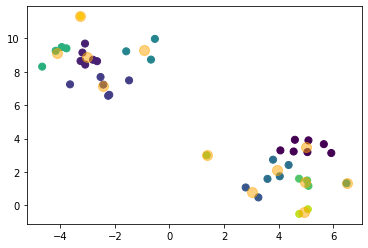

In [163]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='orange', s=100, alpha=0.5)

plt.show()

In [119]:
#  from sklearn.datasets.samples_generator import make_blobs
# X, y = make_blobs(n_samples=40, centers=2, random_state=42, cluster_std=1.25)
# plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap="bwr");
# plt.show()

In [152]:
# Support vector machine linear classifier
# from sklearn.svm import SVC 
# model = SVC(kernel='linear')
# model.fit(X_train_scaled, y_train)

In [121]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(decision_function_shape=None, gamma='auto', kernel='linear')

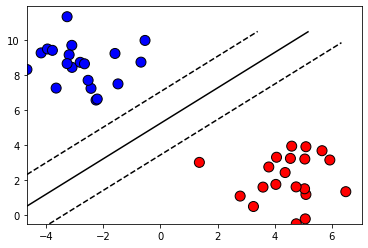

In [122]:
# WARNING! BOILERPLATE CODE HERE!
# Plot the decision boundaries
x_min = X[:, 0].min()
x_max = X[:, 0].max()
y_min = X[:, 1].min()
y_max = X[:, 1].max()

XX, YY = np.mgrid[x_min:x_max, y_min:y_max]
Z = model.decision_function(np.c_[XX.ravel(), YY.ravel()])

# Put the result into a color plot
Z = Z.reshape(XX.shape)
# plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
plt.contour(XX, YY, Z, colors=['k', 'k', 'k'],
            linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolor='k', s=100)
plt.show()

In [117]:
# from sklearn.preprocessing import MinMaxScaler


# MinMaxScaler().fit_transform([y_encoded])
# MinMaxScaler().fit_transform([y_test])

# Train the Model



In [ ]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

# Hyperparameter Tuning

Use `GridSearchCV` to tune the model's parameters

In [ ]:
# Create the GridSearchCV model

In [ ]:
# Train the model with GridSearch

In [ ]:
print(grid2.best_params_)
print(grid2.best_score_)

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import joblib
filename = 'your_name.sav'
joblib.dump(your_model, filename)